In [1]:
import numpy as np

from scipy import optimize

import tqdm

from astropy import units as u
from astropy.coordinates import SkyCoord, AltAz, EarthLocation, get_sun
from astropy.time import Time

first = lambda x:next(iter(x))

%matplotlib inline
from matplotlib import style, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
bmore = EarthLocation.of_address('Baltimore, MD')
mn = EarthLocation.of_address('Eagan, MN')
det = EarthLocation.of_address('Detroit, MI')
port = EarthLocation.of_address('Portland, OR')

In [4]:
approx = Time('2018-12-21')

In [5]:
def insolation(time, loc, extinction_coefficient=0):
    """
    negative insolation means below horizon
    """
    sunaa = get_sun(time).transform_to(AltAz(location=loc, obstime=time))
    flux_factor = (sunaa.distance**-2 * u.AU**2)
    airmass = sunaa.secz
    extinction = np.exp(-extinction_coefficient*(airmass - 1))
    return extinction*flux_factor.decompose()*np.sin(sunaa.alt)

# Baltimore, MD 

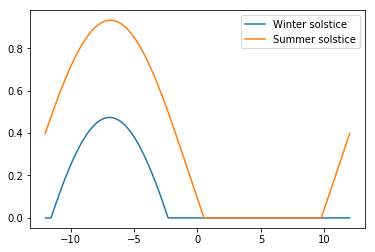

In [9]:
dt = np.linspace(-12, 12, 1000)*u.hour
t = approx + dt

plt.plot(dt, np.maximum(insolation(t, bmore), 0), label='Winter solstice')
plt.plot(dt, np.maximum(insolation(t+365//2*u.day, bmore), 0), label='Summer solstice')
plt.legend()

# Eagan, MN 

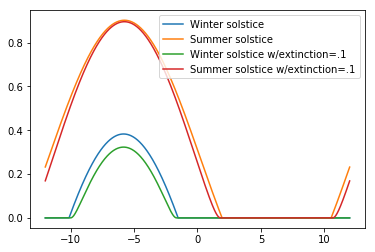

In [13]:
dt = np.linspace(-12, 12, 1000)*u.hour
t = approx + dt

plt.plot(dt, np.maximum(insolation(t, mn), 0), label='Winter solstice')
plt.plot(dt, np.maximum(insolation(t+365//2*u.day, mn), 0), label='Summer solstice')
plt.plot(dt, np.maximum(insolation(t, mn, .1), 0), label='Winter solstice w/extinction=.1')
plt.plot(dt, np.maximum(insolation(t+365//2*u.day, mn, .1), 0), label='Summer solstice w/extinction=.1')
plt.legend(loc=0)

Text(0.5,1,'w/ extinction = $0.1$')

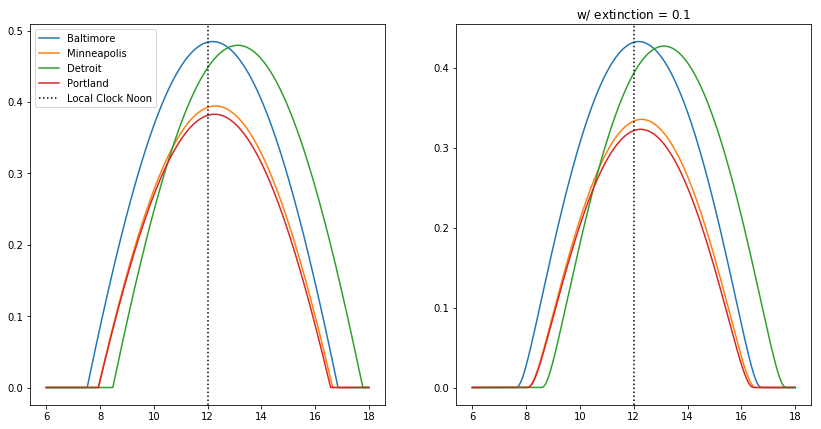

In [22]:
dt = np.linspace(6, 18, 1000)*u.hour
t = Time('2018-1-3 0:00') + dt



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ecoeff = 0.
ax1.plot(dt, np.maximum(insolation(t+5*u.hour, bmore, ecoeff), 0), label='Baltimore')
ax1.plot(dt, np.maximum(insolation(t+6*u.hour, mn, ecoeff), 0), label='Minneapolis')
ax1.plot(dt, np.maximum(insolation(t+5*u.hour, det, ecoeff), 0), label='Detroit')
ax1.plot(dt, np.maximum(insolation(t+8*u.hour, port, ecoeff), 0), label='Portland')
ax1.axvline(12, color='k', ls=':', label='Local Clock Noon')
ax2.set_title('w/o extinction')
ax1.legend(loc=0)

ecoeff = 0.1
ax2.plot(dt, np.maximum(insolation(t+5*u.hour, bmore, ecoeff), 0), label='Baltimore')
ax2.plot(dt, np.maximum(insolation(t+6*u.hour, mn, ecoeff), 0), label='Minneapolis')
ax2.plot(dt, np.maximum(insolation(t+5*u.hour, det, ecoeff), 0), label='Detroit')
ax2.plot(dt, np.maximum(insolation(t+8*u.hour, port, ecoeff), 0), label='Portland')
ax2.axvline(12, color='k', ls=':', label='Local Clock Noon')
ax2.set_title('w/ extinction = ${}$'.format(ecoeff))

# Compare across latitudes 

In [23]:
dt = np.linspace(-12, 12, 1000)*u.hour
t1 = Time('2017-12-21') + dt 
t2 = Time('2017-6-21') + dt

ecoeff = .1

In [24]:
insols1 = []
lats = np.linspace(-90, 90, 101)[:-1]*u.deg
for lat in tqdm.tqdm_notebook(lats):
    loc = EarthLocation(lon=mn.lon, lat=lat)
    insols1.append(insolation(t1, loc, ecoeff))
insols1 = np.array(insols1)

/Users/erik/miniconda3/envs/astro36/lib/python3.6/site-packages/astropy/units/quantity.py:461: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [25]:
insols2 = []
lats = np.linspace(-90, 90, 101)[:-1]*u.deg
for lat in tqdm.tqdm_notebook(lats):
    loc = EarthLocation(lon=mn.lon, lat=lat)
    insols2.append(insolation(t2, loc, ecoeff))
insols2 = np.array(insols2)

/Users/erik/miniconda3/envs/astro36/lib/python3.6/site-packages/astropy/units/quantity.py:461: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity [ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81.] deg>

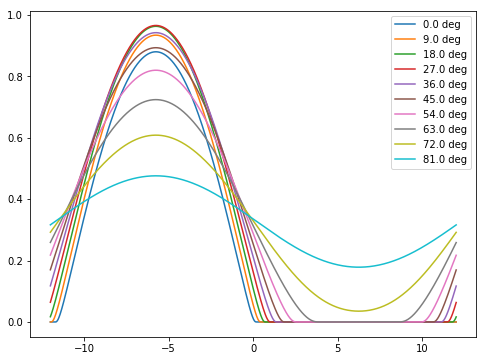

In [26]:
slc = slice(50, None, 5)

plt.figure(figsize=(8,6))
plt.plot(dt, np.maximum(insols2, 0)[slc].T)
plt.legend([l for l in lats[slc]])
lats[slc]

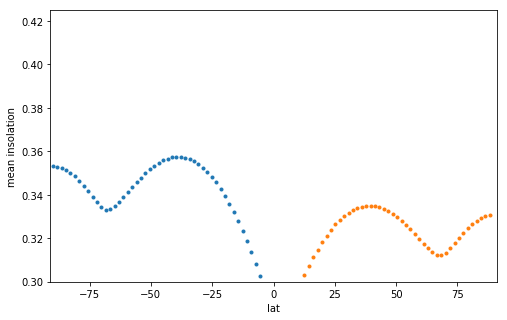

In [27]:
plt.figure(figsize=(8,5))
plt.plot(lats, np.mean(np.maximum(insols1, 0), axis=1), 'o', ms=3)
plt.plot(lats, np.mean(np.maximum(insols2, 0), axis=1), 'o', ms=3)

plt.xlim(-91, 91)
plt.ylim(.3, .425)
plt.xlabel('lat')
plt.ylabel('mean insolation')
None

# Varying atmospheric extinction 

In [28]:
insolss = {}
lats = np.linspace(0, 90, 50)*u.deg
coeffs = [0, .1, .2,.5, 1]
for ecoeff in tqdm.tqdm_notebook(coeffs):
    insolss[ecoeff] = []
    for lat in tqdm.tqdm_notebook(lats):
        loc = EarthLocation(lon=mn.lon, lat=lat)
        insolss[ecoeff].append(insolation(t2, loc, ecoeff))
    insolss[ecoeff] = np.array(insolss[ecoeff])

/Users/erik/miniconda3/envs/astro36/lib/python3.6/site-packages/astropy/units/quantity.py:461: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


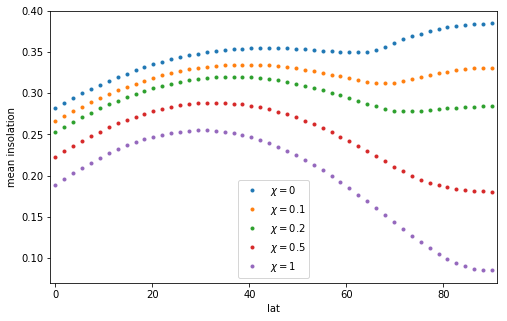

In [29]:
plt.figure(figsize=(8,5))

for ecoeff in coeffs:
    plt.plot(lats, np.mean(np.maximum(insolss[ecoeff], 0), axis=1), 'o', ms=3, label=r'$\chi = {}$'.format(ecoeff))

    plt.xlim(-1, 91)
    plt.xlabel('lat')
    plt.ylabel('mean insolation')
plt.legend(loc=0)

# Insolation optimization

## Latitude-dependent

In [242]:
def fopt(lat, time, lon, ecoeff):
    if not -90 <= lat <= 90:
        return 1
    loc = EarthLocation(lat=lat*u.deg, lon=lon)
    insols = np.maximum(insolation(time, loc, extinction_coefficient=ecoeff), 0)
    return -np.mean(insols.value)

/Users/erik/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


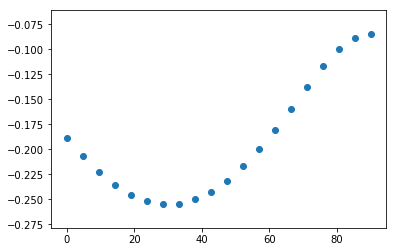

In [371]:
lats = np.linspace(0, 90, 20)

plt.scatter(lats, [fopt(lat, t2, mn.lon, 1) for lat in lats])

In [378]:
optimize.minimize_scalar(fopt, bounds=(-90, 90), args=(t2, mn.lon, 0))

     fun: -0.38505406297381622
    nfev: 38
     nit: 37
 success: True
       x: 89.999998571264982

In [379]:
optimize.minimize_scalar(fopt, bounds=(-90, 90), args=(t2, mn.lon, 0.1))

     fun: -0.33498285374854447
    nfev: 12
     nit: 11
 success: True
       x: 38.963086579210454

In [380]:
optimize.minimize_scalar(fopt, bounds=(-90, 90), args=(t2, mn.lon, 0.2))

     fun: -0.32010733819473208
    nfev: 10
     nit: 9
 success: True
       x: 36.586296027837541

In [381]:
optimize.minimize_scalar(fopt, bounds=(-90, 90), args=(t2, mn.lon, 0.5))

/Users/erik/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


     fun: -0.28853979328681545
    nfev: 9
     nit: 8
 success: True
       x: 32.833560515336288

In [382]:
optimize.minimize_scalar(fopt, bounds=(-90, 90), args=(t2, mn.lon, 1))

/Users/erik/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


     fun: -0.25497261432955026
    nfev: 12
     nit: 11
 success: True
       x: 30.014270817079034

## Time-dependent 

At a given latitude, when in the insolation minimized over a whole day?

In [311]:
t0 = Time('2018-12-21') 

In [308]:
def day_insolation(t0, lat, lon, ecoeff, npoints=1000):
    dt = np.linspace(-12, 12, 1000)*u.hour
    loc = EarthLocation(lat=lat*u.deg, lon=lon)
    
    insols = np.maximum(insolation(t0+dt, loc, extinction_coefficient=ecoeff), 0)
    
    return np.mean(insols.value)

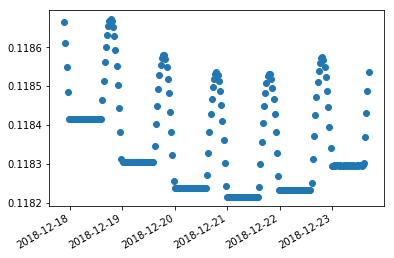

In [362]:
dtday = np.linspace(-2.9, 2.9, 257)

utc_to_est = -(5*u.hour).to(u.day).value  #add this to plot_date

plt.plot_date((t0 + dtday*u.day).plot_date + utc_to_est, [fopt(di, bmore.lat.deg, 0, 0) for di in dtday])
plt.gcf().autofmt_xdate()

# Significant-length flight insolation changes

In [59]:
import astroplan

In [84]:
def day_time(timenearset, locset, locrise):
    sset = astroplan.Observer(locset).sun_set_time(timenearset, which='nearest')
    srise = astroplan.Observer(locrise).sun_rise_time(sset, which='previous')
    return (sset - srise).to(u.hour)

In [99]:
flightday = Time('2017-12-22')
days = flightday + np.arange(-2,3)*u.day

In [109]:
lengths = u.Quantity([day_time(t, mn, bmore) for t in days])
lengths

<Quantity [ 10.02346083, 10.02171004, 10.02118541, 10.02189031,
            10.02382736] h>

In [110]:
lengths = u.Quantity([day_time(t, bmore, bmore) for t in days])
lengths

<Quantity [ 9.23455524, 9.23297087, 9.23247474, 9.23306933, 9.23475638] h>

In [111]:
lengths = u.Quantity([day_time(t, mn, mn) for t in days])
lengths

<Quantity [ 8.60423144, 8.60228124, 8.60170082, 8.60249357, 8.60466225] h>

In [112]:
lengths = u.Quantity([day_time(t, det, det) for t in days])
lengths

<Quantity [ 8.90348587, 8.90166476, 8.90107115, 8.90170799, 8.90357753] h>

# When does the "true" solstice occur? 

Now we are taking the simplified insolation that doesn't include atmosphere, day/night, etc, just the spherical surface geometric and distance correction:

In [209]:
t0 = Time('2018-12-21')

def insolation_simple(time, loc, incl_distance=True):
    """
    negative insolation means below horizon
    """
    sung = get_sun(time)
    
    flux_factor = 1
    if not incl_distance:
        flux_factor = (sung.distance**-2 * u.AU**2)
    angle_factor = np.cos(loc.lat - sung.dec)
    return flux_factor*angle_factor

In [210]:
res = optimize.fmin(lambda dtday, t0, loc, incl_distance:insolation_simple(dtday * u.day + t0, loc, incl_distance), 0, args=(t0, bmore, True))
solstice_distance = (t0 + res[0]*u.day)
solstice_distance.datetime

Optimization terminated successfully.
         Current function value: 0.458221
         Iterations: 25
         Function evaluations: 50


datetime.datetime(2018, 12, 22, 4, 25, 51, 600000)

In [211]:
res = optimize.fmin(lambda dtday, t0, loc, incl_distance:insolation_simple(dtday * u.day + t0, loc, incl_distance), 0, args=(t0, bmore, False))

solstice_nodistance = (t0 + res[0]*u.day)
solstice_nodistance.datetime

Optimization terminated successfully.
         Current function value: 0.473556
         Iterations: 24
         Function evaluations: 48


datetime.datetime(2018, 12, 21, 15, 47, 15)

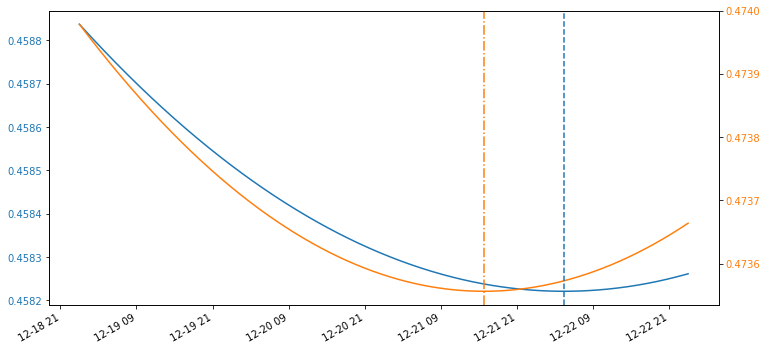

In [212]:
fig = plt.figure(figsize=(12, 6))

dt = np.linspace(-2, 2, 1000)
ts = t0 + dt*u.day

l1 = plt.plot_date(ts.plot_date, insolation_simple(ts, bmore), fmt='-')
ax1 = plt.gca()
for tk in ax1.get_yaxis().get_ticklabels():
    tk.set_color(l1[0].get_color())

ax2 = plt.twinx()
next(ax2._get_lines.prop_cycler)
l2 = plt.plot_date(ts.plot_date, insolation_simple(ts, bmore, False), fmt='-')
for tk in ax2.get_yaxis().get_ticklabels():
    tk.set_color(l2[0].get_color())

plt.axvline(solstice_distance.plot_date, ls='--', color=l1[0].get_color())
plt.axvline(solstice_nodistance.plot_date, ls='-.', color=l2[0].get_color())

fig.autofmt_xdate()

(0, 1.01)

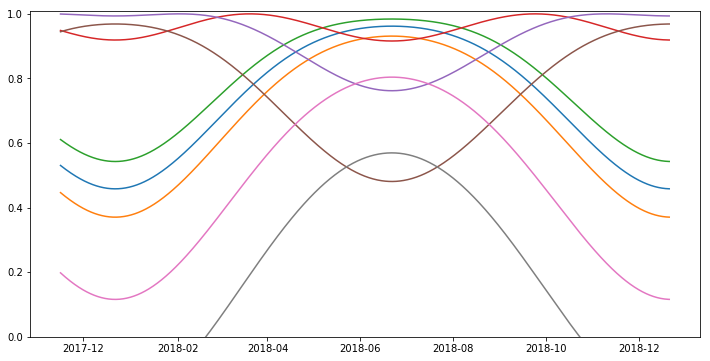

In [239]:
fig = plt.figure(figsize=(12, 6))

dt = np.linspace(-400, 0, 1000)
ts = t0 + dt*u.day


plt.plot_date(ts.plot_date, insolation_simple(ts, bmore), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, mn), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Irvine, CA')), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Quito, Ecuador')), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Cairns, Australia')), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Melbourne, Australia')), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Oslo, Norway')), fmt='-')
plt.plot_date(ts.plot_date, insolation_simple(ts, EarthLocation.of_address('Svalbard, Norway')), fmt='-')

plt.ylim(0, 1.01)